In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\prajwal\Downloads\placement (2).csv")

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [5]:
df.duplicated().sum()

19

In [6]:
new_df = df.drop_duplicates()

In [7]:
new_df.duplicated().sum()

0

In [8]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [10]:
X_train

,cgpa,placement_exam_marks
175,7.57,26.0
818,5.52,62.0
677,6.75,24.0
952,7.71,25.0
200,5.77,22.0
...,...,...
534,6.05,45.0
584,6.57,60.0
493,6.80,18.0
527,7.72,37.0


In [11]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
model = Sequential()
model.add(Dense(2, activation = 'relu', input_dim = 2))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

C:\Users\prajwal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,399 (44.53 KB)

 Trainable params: 11,399 (44.53 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss = 'mean_squared_error', optimizer = 'Adam', metrics=['accuracy'])

In [16]:
callback = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.00001,
    patience = 50,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False
)

In [17]:
history = model.fit(X_train, y_train, epochs = 800, validation_split = 0.2, callbacks=callback)

Epoch 1/800
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.5057 - loss: 0.3900 - val_accuracy: 0.5250 - val_loss: 0.2681
Epoch 2/800
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5714 - loss: 0.2523 - val_accuracy: 0.4938 - val_loss: 0.2755
Epoch 3/800
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5424 - loss: 0.2584 - val_accuracy: 0.5063 - val_loss: 0.2571
Epoch 4/800
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5187 - loss: 0.2545 - val_accuracy: 0.4812 - val_loss: 0.3086
Epoch 5/800
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5120 - loss: 0.2885 - val_accuracy: 0.4750 - val_loss: 0.2661
Epoch 6/800
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5169 - loss: 0.2883 - val_accuracy: 0.5188 - val_loss: 0.2531
Epoch 7/800
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5046 - loss: 0.2556 - val_accuracy: 0.5250 - val_loss: 0.2586
Epoch 8/800
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5416 - loss: 0.2543 - val_accuracy: 0.5250 - 

In [20]:
# Early Stopping stops the epochs at 67

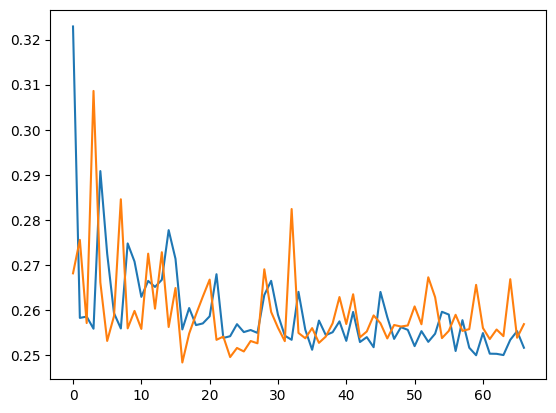

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])